In [1]:
!pip install catboost
!pip install xgboost

     -------------------------------------- 101.0/101.0 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 99.7/99.7 MB 5.0 MB/s eta 0:00:00


In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df = pd.read_excel('data/crime.xlsx')

In [2]:
df.head()

df = df.dropna()
df.isnull().sum()

weights = {
    'People affected': 0.25,
    'Componseation': 0.25,
    'Time period': 0.25,
    'Death': 0.25
}

# Convert columns to numeric (excluding non-numeric columns)
numeric_columns = ['People affected', 'Componseation', 'Time period', 'Death']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Replace any remaining non-numeric values with NaN
df[numeric_columns] = df[numeric_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Normalize each column (including the scaled columns) by dividing by its maximum value
for column in numeric_columns:
    df[column] = df[column] / df[column].max()

# Calculate the "Priority Score" for each row
df['Priority Score'] = df.apply(lambda row: sum(row[column] * weights[column] for column in weights), axis=1)

# Rescale "Priority Score" to the range of 0 to 10
min_score = df['Priority Score'].min()
max_score = df['Priority Score'].max()
df['Priority Score'] = 0 + (df['Priority Score'] - min_score) * (10 - 0) / (max_score - min_score)

# Print the DataFrame with the new "Priority Score" column
print(df)


df.head()

X = df.drop(['Priority Score','Description'],axis=1)

X.head()

Y = df['Priority Score']

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
# the below code is responsible for transforming the columns
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

X = preprocessor.fit_transform(X)


X.shape




# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=42)
X_train.shape, X_test.shape



def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

KeyboardInterrupt: 

In [6]:
numeric_columns = ['People affected', 'Compensation', 'Time period', 'Death']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Replace any remaining non-numeric values with NaN
df[numeric_columns] = df[numeric_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Normalize each column (including the scaled columns) by dividing by its maximum value
for column in numeric_columns:
#     df[column] = df[column] / df[column].max()
    print(df[column].max())

450000000
120000000
29.0
52


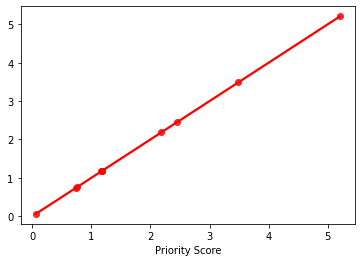

In [47]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

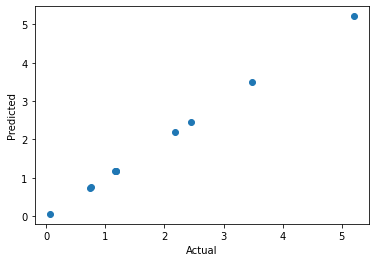

In [48]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');